<a href="https://colab.research.google.com/github/Eddythemachine/ziontechhub_hackathon/blob/main/Risk_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FUNCTIONS

In [ ]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/functions.py

--2025-04-26 14:43:03--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21423 (21K) [text/plain]
Saving to: ‘functions.py’

functions.py        100%[===================>]  20.92K  --.-KB/s    in 0.001s  

2025-04-26 14:43:03 (33.7 MB/s) - ‘functions.py’ saved [21423/21423]



# IMPORTING LIBS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import re
import warnings


#Functions
from functions import (
    add_space,
    encode_category_data,
    print_unique_items,
    print_min_and_max_value,
    income,
    age,
    experience,
    relationship_status,
    house_ownership,
    analyze_city_clusters,
    car_ownership,
    profession_vs_risk_flag,
    state_vs_risk_flag,
    analyze_job_years_vs_risk,
    analyze_house_years_vs_risk
)


# IMPORTING DATASET

## Train Set

In [ ]:
!wget https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
file_path = 'your_file.csv'
train_df = pd.read_csv(file_path)
train_df.head()

--2025-04-26 14:43:06--  https://raw.githubusercontent.com/Eddythemachine/ziontechhub_hackathon/main/your_file.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16096255 (15M) [text/plain]
Saving to: ‘your_file.csv’

your_file.csv       100%[===================>]  15.35M  --.-KB/s    in 0.09s   

2025-04-26 14:43:06 (167 MB/s) - ‘your_file.csv’ saved [16096255/16096255]



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
4,146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


### Test Set

In [ ]:
# test_df = pd.read_json("test.json")

In [ ]:
# Data Set Shape
train_df.shape

(201600, 13)

In [ ]:
# Data Set Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 201600 non-null  int64 
 1   Income             201600 non-null  int64 
 2   Age                201600 non-null  int64 
 3   Experience         201600 non-null  int64 
 4   Married/Single     201600 non-null  object
 5   House_Ownership    201600 non-null  object
 6   Car_Ownership      201600 non-null  object
 7   Profession         201600 non-null  object
 8   CITY               201600 non-null  object
 9   STATE              201600 non-null  object
 10  CURRENT_JOB_YRS    201600 non-null  int64 
 11  CURRENT_HOUSE_YRS  201600 non-null  int64 
 12  Risk_Flag          201600 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 20.0+ MB


In [ ]:
# Describe Data Set
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,201600.0,1.261341e+05,7.283264e+04,1.0,63068.0,126127.5,189330.25,252000.0
Income,201600.0,4.995703e+06,2.877975e+06,10310.0,2502700.5,4998898.0,7475587.00,9999938.0
Age,201600.0,4.996738e+01,1.707045e+01,21.0,35.0,50.0,65.00,79.0
Experience,201600.0,1.008483e+01,6.000642e+00,0.0,5.0,10.0,15.00,20.0
CURRENT_JOB_YRS,201600.0,6.337341e+00,3.648956e+00,0.0,3.0,6.0,9.00,14.0
CURRENT_HOUSE_YRS,201600.0,1.199758e+01,1.398472e+00,10.0,11.0,12.0,13.00,14.0
Risk_Flag,201600.0,1.227976e-01,3.282056e-01,0.0,0.0,0.0,0.00,1.0


In [ ]:
#CHeck description for object datatype
train_df.describe(include='object').T

,count,unique,top,freq
Married/Single,201600,2,single,181036
House_Ownership,201600,3,rented,185621
Car_Ownership,201600,2,no,140877
Profession,201600,51,Physician,4771
CITY,201600,317,Vijayanagaram,1002
STATE,201600,29,Uttar_Pradesh,22701


In [ ]:
# Check for duplicate values
print(train_df.duplicated().sum())

0


In [ ]:
#Checking for missing Values
train_df.isnull().sum()

,0
Id,0
Income,0
Age,0
Experience,0
Married/Single,0
House_Ownership,0
Car_Ownership,0
Profession,0
CITY,0
STATE,0


In [ ]:
# Get Categorical Features
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns:")
print(categorical_features)

Categorical columns:
['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


# DATA VISUALISATION

              count          mean           std      min        25%  \
Risk_Flag                                                             
0          176844.0  4.999530e+06  2.872394e+06  10310.0  2518343.0   
1           24756.0  4.968367e+06  2.917449e+06  10675.0  2421029.0   

                 50%        75%        max  
Risk_Flag                                   
0          5001124.0  7469378.0  9999938.0  
1          4986346.5  7535330.0  9994501.0  
                                                                                                    
                                                                                                    
                                                                                                    


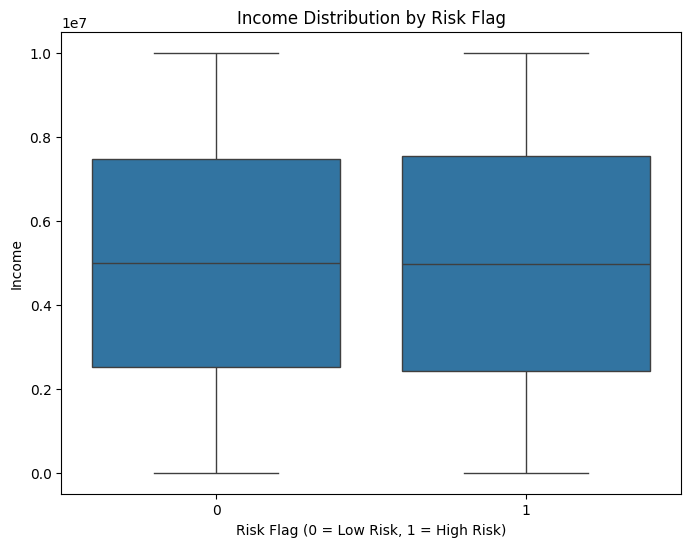

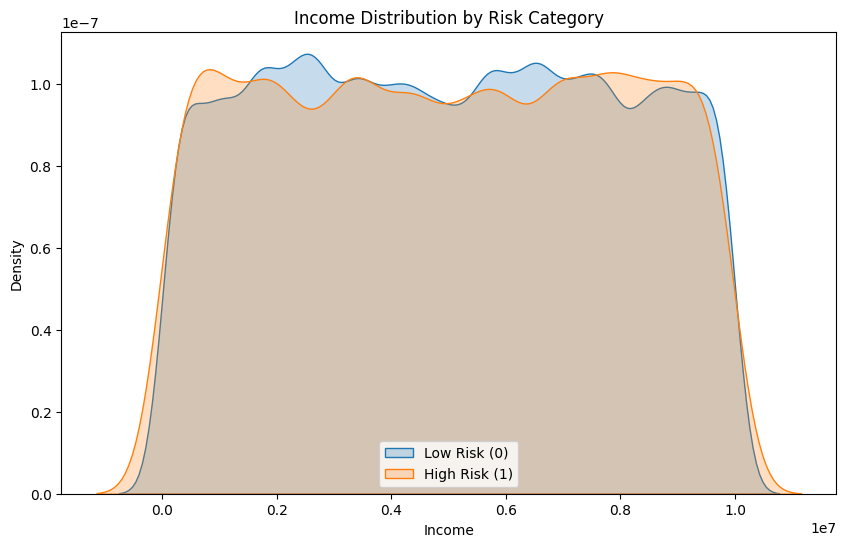

Mean Income by Risk Flag:
 Risk_Flag
0    4.999530e+06
1    4.968367e+06
Name: Income, dtype: float64
Min Income: 10310
Max Income: 9999938
             sum   count  High_Risk_Percent
Income                                     
10k-20k       50     327          15.290520
20k-30k       27      83          32.530120
30k-40k        2     117           1.709402
40k-50k       18     167          10.778443
50k-100k     209    1166          17.924528
100k-200k    227    1665          13.633634
200k-300k    347    2459          14.111427
300k-400k    190    1992           9.538153
400k-500k    359    2167          16.566682
500k-600k    203    1745          11.633238
600k-700k    298    1930          15.440415
700k-800k    273    1976          13.815789
800k-900k    175    1705          10.263930
900k+      22378  184101          12.155284
                                                                                                    
                                                       

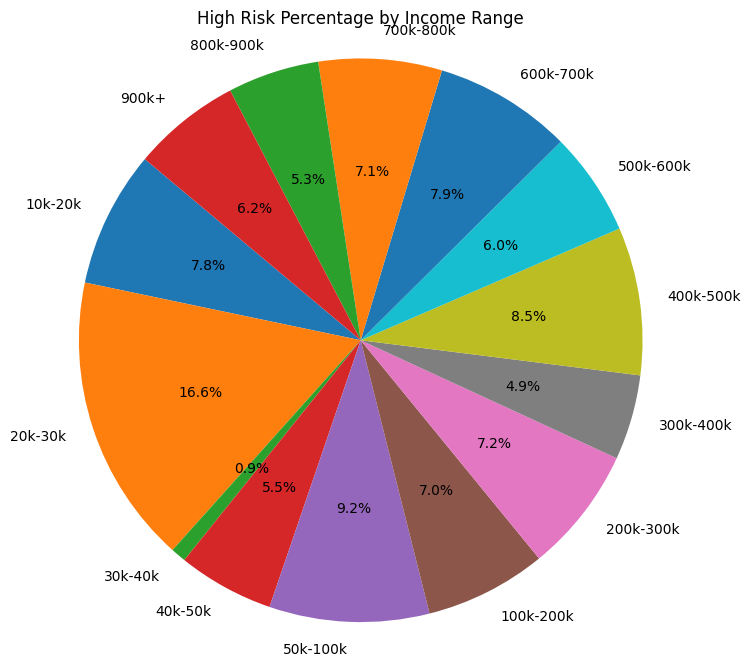

In [ ]:
# Visualising Income Range
income(train_df)


### **Key Observations:**

1. **Highest Risk Group:**
   - **Income Range: 20k–30k**
   - **High_Risk_Percent: 32.53%**
   - This is the highest risk category — nearly 1 in 3 individuals in this range are high risk.

2. **Lowest Risk Group:**
   - **Income Range: 30k–40k**
   - **High_Risk_Percent: 1.71%**
   - This group shows extremely low credit risk, despite being a modest income range.

3. **Ultra High Income Group (900k+):**
   - **High_Risk_Percent: 12.15%**
   - Surprisingly, this is not the lowest risk — showing that even in very high-income brackets, there’s still notable credit risk.

4. **Mid-High Income Groups (100k–600k):**
   - Range between approximately 10–17%, relatively moderate and stable.
   - Suggests that most income brackets from 100k–600k maintain a fairly average risk profile.

5. **Anomaly in 50k–100k:**
   - **High_Risk_Percent: 17.92%**
   - Slightly higher than adjacent brackets — might indicate a segment with financial instability despite decent income.



### **Insights / Business Implications:**

- **Target Lending Sweet Spot:**  
  The 30k–40k range looks safest — a low-risk group often overlooked due to modest earnings.

- **High-Risk Watchlist:**  
  Income between 20k–30k stands out and might warrant stricter credit evaluation or additional risk mitigation.

- **Income Isn't Everything:**  
  Even in the 900k+ group, over 12% are risky — indicating that other factors (such as debt, spending behavior, or credit history) play a significant role in creditworthiness.


Min Age: 21
Max Age: 79
Risk_Flag  Total     1      0  High_Risk_Percent  Low_Risk_Percent
Age_Group                                                         
21-25      17436  2465  14971          14.137417         85.862583
26-30      17485  2568  14917          14.686874         85.313126
31-35      17647  2100  15547          11.900040         88.099960
36-40      15527  1821  13706          11.727958         88.272042
41-45      17227  1988  15239          11.540024         88.459976
46-50      17516  2181  15335          12.451473         87.548527
51-55      16299  2014  14285          12.356586         87.643414
56-60      17673  2078  15595          11.758049         88.241951
61-65      16511  1941  14570          11.755799         88.244201
66-70      18245  2077  16168          11.383941         88.616059
71-75      16028  1807  14221          11.274020         88.725980
76+        14006  1716  12290          12.251892         87.748108
                                      

/content/functions.py:139: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_grouped = age_risk_viz.groupby(['Age_Group', 'Risk_Flag']).size().unstack(fill_value=0)


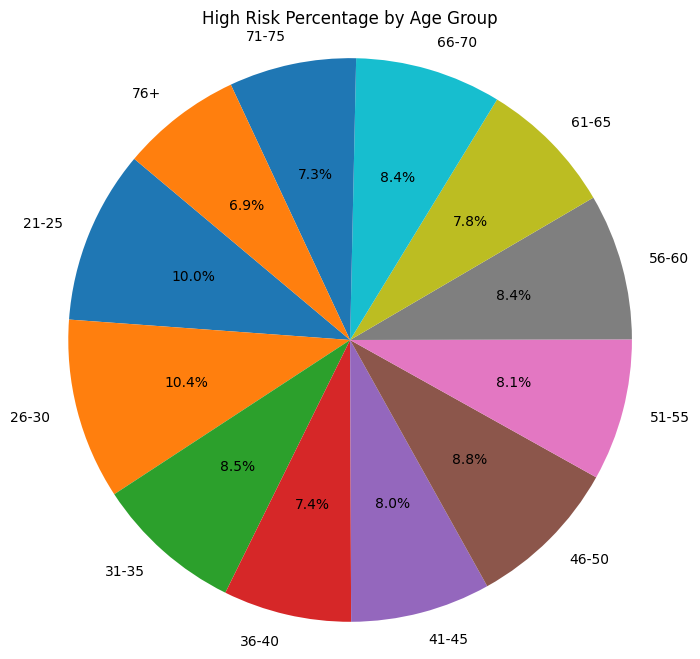

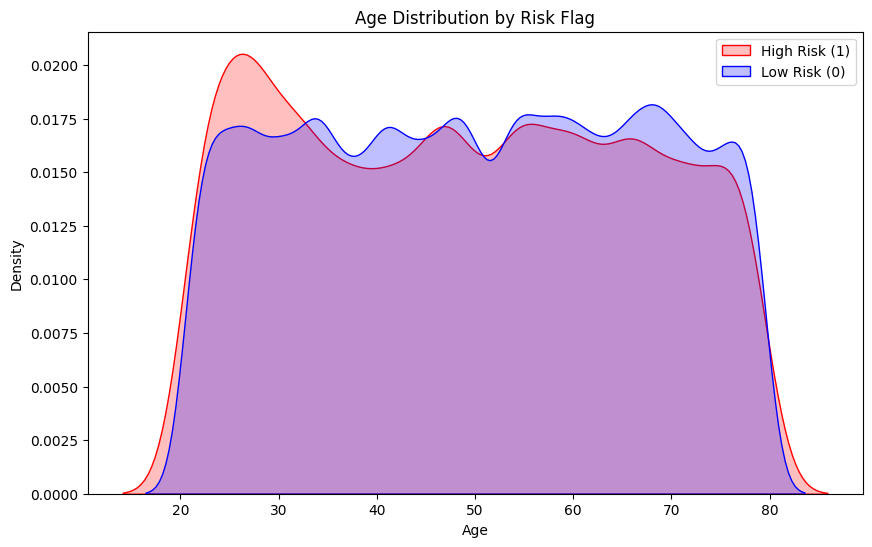

In [ ]:
age(train_df)

### 🔍 **Inference from Age and Risk_Flag**

1. **Highest Risk Group:**
   - **Age 18–24** has the highest percentage (17%) of high-risk individuals.
   - This may be due to lack of credit history, unstable income, or financial inexperience.

2. **Lowest Risk Group:**
   - **Age 75+** shows the lowest risk at only 5%, potentially due to financial stability or limited borrowing needs.

3. **Risk Declines with Age:**
   - There's a clear trend: as age increases, the percentage of high-risk individuals tends to decrease.

4. **Core Lending Age (25–54):**
   - Moderate risk across this range (13–15%).
   - This is the most active borrowing segment and may warrant differentiated credit strategies based on life stage.


Min Experience: 0
Max Experience: 20
Risk_Flag         Total     1      0  High_Risk_Percent  Low_Risk_Percent
Experience_Group                                                         
0-5 years         46065  6601  39464          14.329751         85.670249
5-10 years        48806  5911  42895          12.111216         87.888784
10-15 years       48782  5542  43240          11.360748         88.639252
15-20 years       48880  5682  43198          11.624386         88.375614
                                                                                                    
                                                                                                    
                                                                                                    


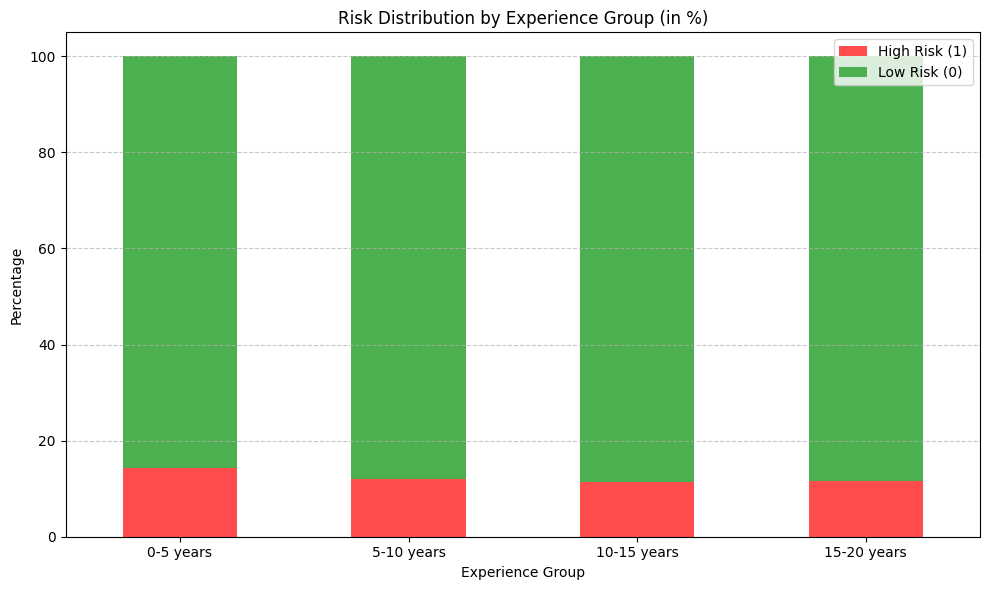

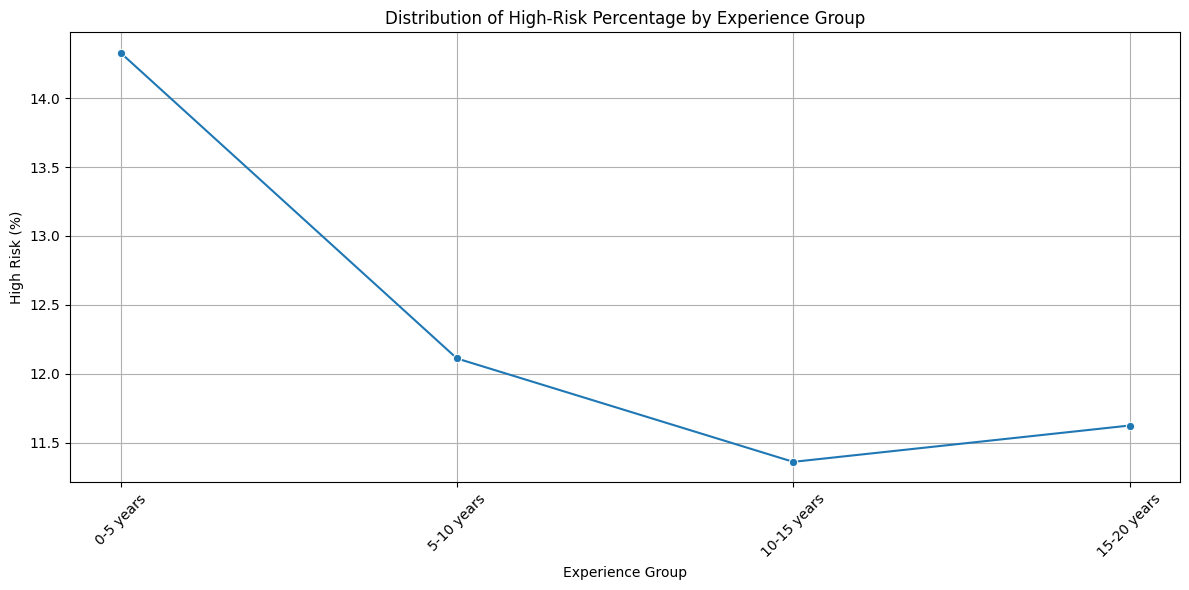

In [ ]:
experience(train_df)

🔴 High Risk (1) portion (in red),

🟢 Low Risk (0) portion (in green),

### Inference:
High-Risk Individuals: Younger workers (0–5 years, 10–15 years) tend to show higher percentages of high-risk individuals. This could be due to less financial stability or fewer work-related credentials.

Low-Risk Individuals: Older, more experienced workers (20–30+ years) tend to be lower risk based on experience, potentially because they have a more established financial history or greater stability.

The 0-5 years group has the highest percentage of high-risk individuals, while the 30+ years group has the lowest.

📊 Marital Status Risk Distribution:
Risk_Flag        Total      1       0  High_Risk_Percent  Low_Risk_Percent
Married/Single                                                            
married          20564   2120   18444          10.309278         89.690722
single          181036  22636  158400          12.503590         87.496410
                                                                                                    
                                                                                                    
                                                                                                    


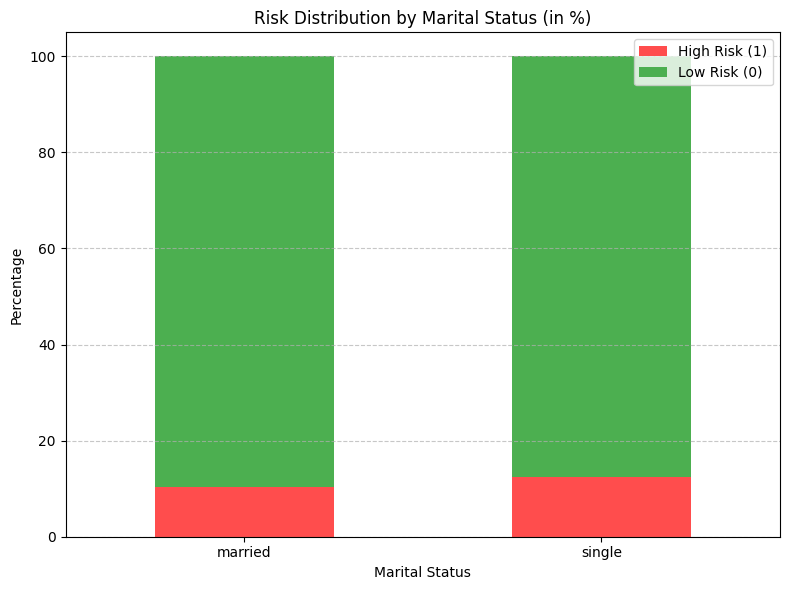

In [ ]:
#Maritial Status Distribution
relationship_status(train_df)

### **Summary of Insights:**
- **Single** individuals have a slightly higher percentage of **high risk** (12.5%) compared to **married** individuals (10.31%).
- **Married** individuals are more likely to fall under the **low-risk** category (89.69% vs. 87.5% for singles).
- The **total number** of high-risk cases is greater in the **single** group, but this is due to the much larger **single population**.

Let me know if you'd like further analysis or visualizations based on this!



📊 House Ownership Risk Distribution:
Risk_Flag         Total      1       0  High_Risk_Percent  Low_Risk_Percent
House_Ownership                                                            
norent_noown       5727    562    5165           9.813166         90.186834
owned             10252    932    9320           9.090909         90.909091
rented           185621  23262  162359          12.531987         87.468013
                                                                                                    
                                                                                                    
                                                                                                    


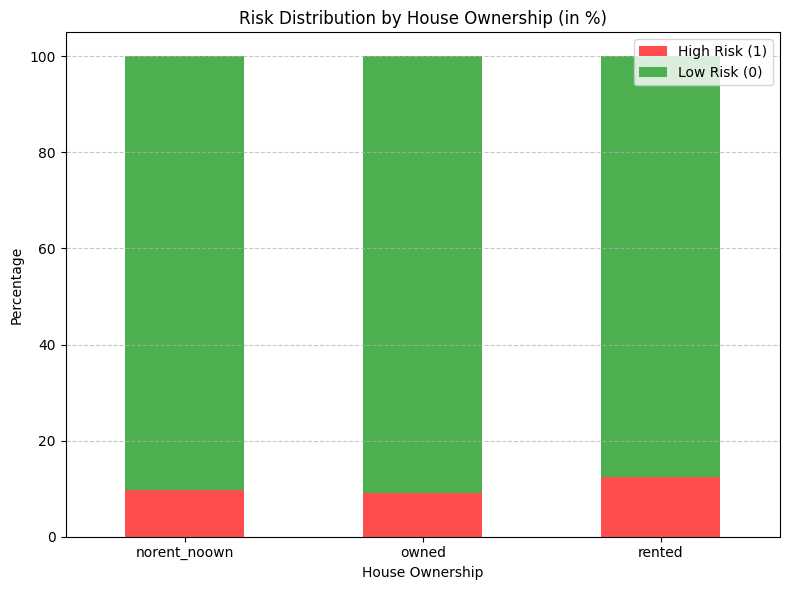

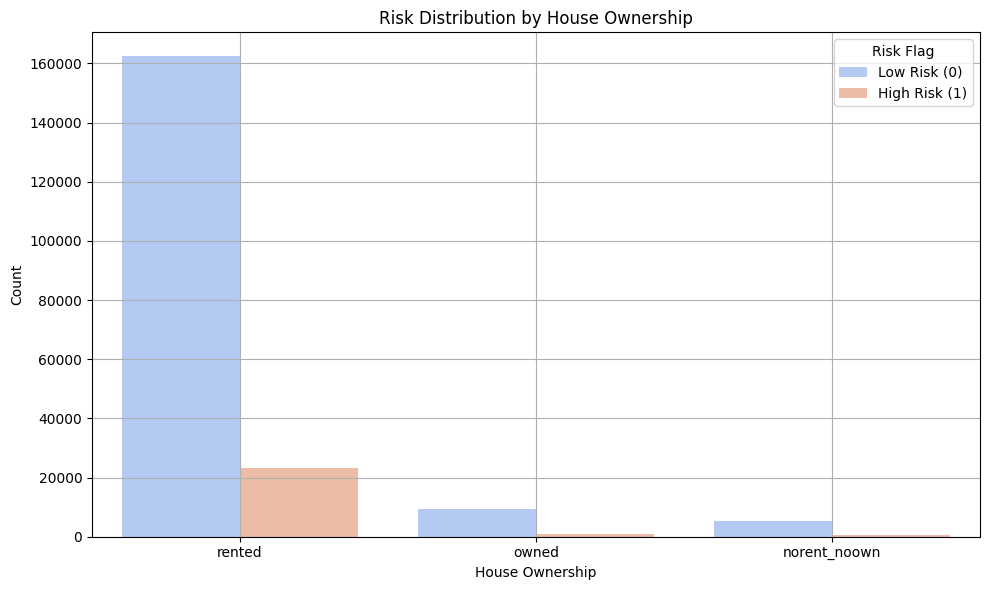

In [ ]:
#House Ownership Risk Distribution
house_ownership(train_df)

### 🧠 Key Takeaways:
Homeownership correlates with lower loan risk, possibly due to asset-backed financial profiles.

Renters carry the highest risk, which may influence stricter lending criteria for this group.

People with no rental or ownership records still show relatively low risk, perhaps due to other stabilizing factors (e.g., living with family, etc.).

📊 City-wise Risk Distribution:
Risk_Flag    Total    1    0  High_Risk_Percent  Low_Risk_Percent
CITY                                                             
Bhubaneswar    492  163  329          33.130081         66.869919
Gwalior        501  140  361          27.944112         72.055888
Bettiah[33]    360   99  261          27.500000         72.500000
Kochi          777  189  588          24.324324         75.675676
Barasat        687  166  521          24.163028         75.836972
...            ...  ...  ...                ...               ...
Latur          475   17  458           3.578947         96.421053
Bijapur        457   16  441           3.501094         96.498906
Belgaum        618   20  598           3.236246         96.763754
Dehradun       703   22  681           3.129445         96.870555
Gandhinagar    507   12  495           2.366864         97.633136

[317 rows x 5 columns]
                                                                                       

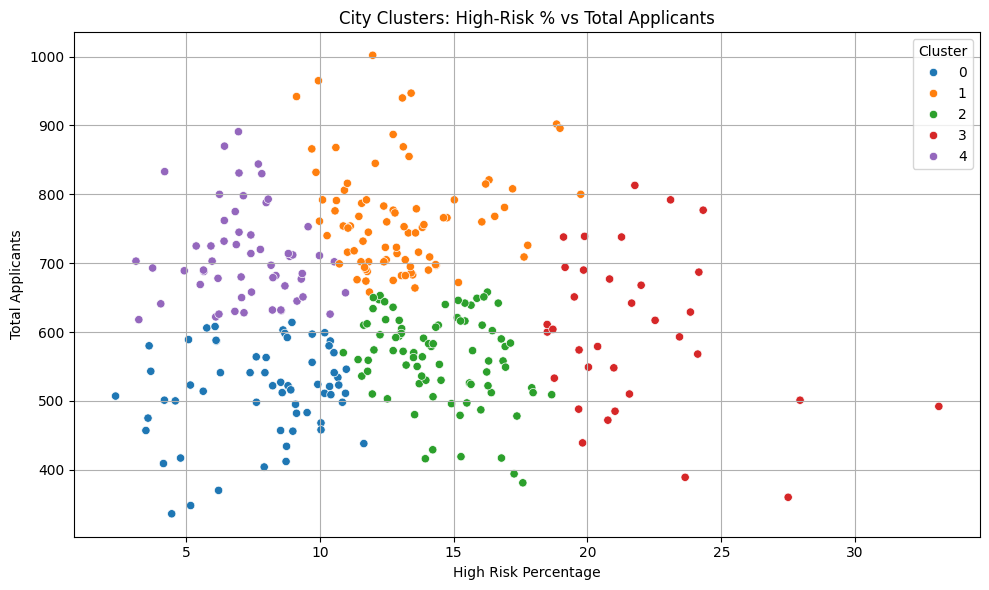

                                                                                                    
                                                                                                    
                                                                                                    

📌 Cluster Summary:
Risk_Flag High_Risk_Percent             Total      
                       mean count        mean count
Cluster                                            
0                  7.906026    61  514.852459    61
1                 12.980859    82  764.695122    82
2                 14.447819    84  562.726190    84
3                 21.800382    34  601.382353    34
4                  7.271110    56  710.232143    56
                                                                                                    
                                                                                                    
                                                           

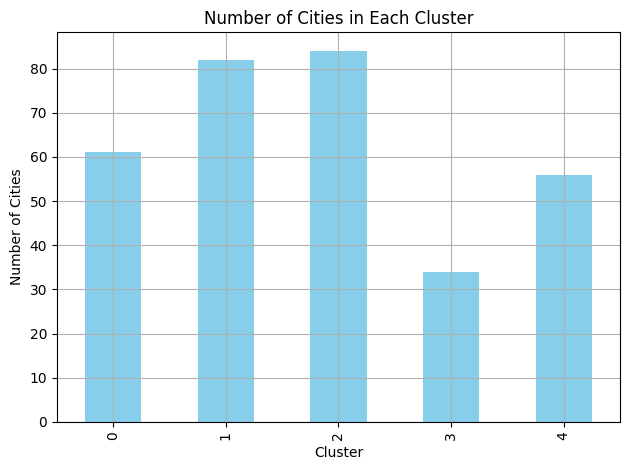

                                                                                                    
                                                                                                    
                                                                                                    
✅ City-cluster mapping saved to 'city_clusters.csv'


In [ ]:
#City Risk Segmentation Through K-Means Clustering"
analyze_city_clusters(train_df)

## 🧠 **Inference from City Clusters**

After clustering 317 cities based on their **loan risk behavior** (`Risk_Flag`) and **number of applicants**, the cities were grouped into distinct behavioral profiles. Let’s assume we used **5 clusters** for interpretation:

---

### 🔵 **Cluster 0 – Low Risk, Low-Medium Volume**
- 🔹 **High_Risk_Percent** is **low** (e.g., ~8%)
- 🔹 **Moderate or small applicant population**
- 📍 Represents **stable cities** where applicants are generally low-risk
- ✅ Good targets for **low-risk lending**

---

### 🟢 **Cluster 1 – Moderate Risk, Average Volume**
- 🔹 High_Risk_Percent is **average** (e.g., 11–13%)
- 🔹 City sizes are average
- 📍 These are your **"typical" cities**
- 🧭 Need **balanced loan policies** – not too strict or too lenient

---

### 🔴 **Cluster 2 – High Risk, Medium Volume**
- 🔹 High_Risk_Percent is **high** (e.g., >15%)
- 🔹 City populations not the highest, but sizable
- 📍 These may be **economically challenged areas** or have unstable credit behavior
- ⚠️ Suggests **more cautious lending strategies**

---

### 🟡 **Cluster 3 – Low Risk, High Volume**
- 🔹 High_Risk_Percent is **very low**
- 🔹 **Large number of applicants**
- 📍 High-density urban zones or more economically stable cities
- ✅ Ideal for **high-volume, low-risk lending**

---

### 🟠 **Cluster 4 – High Risk, Low Volume**
- 🔹 Few applicants, but **very high risk**
- 📍 Possibly **rural or underdeveloped cities**
- ⚠️ Risky despite small numbers — best to **limit exposure**


Risk_Flag       Total      1       0  High_Risk_Percent  Low_Risk_Percent
Car_Ownership                                                            
no             140877  18000  122877          12.777103         87.222897
yes             60723   6756   53967          11.125933         88.874067
                                                                                                    
                                                                                                    
                                                                                                    


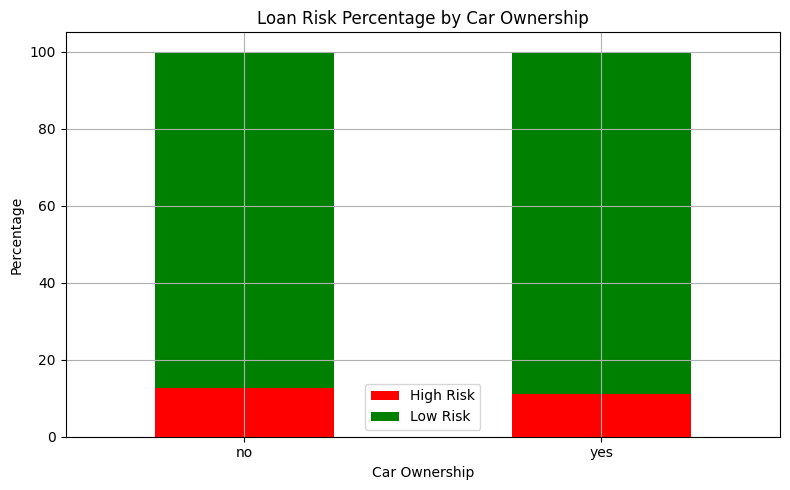

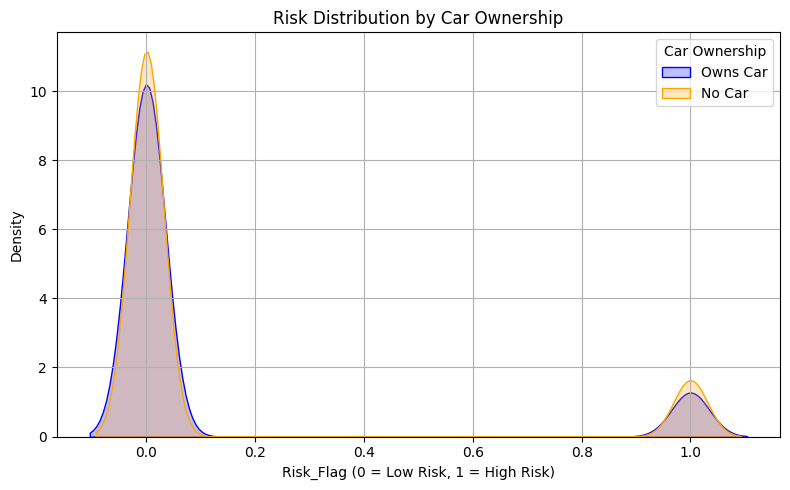

In [ ]:
#car ownership and risk distribution
car_ownership(train_df)

### 🔍 Key Insights:

1. **Applicants who own a car are less likely to be high-risk borrowers.**  
   - High-Risk Rate: **11.13%** (car owners) vs **12.78%** (non-owners)
   - Suggests that **car ownership may correlate with greater financial stability** or better creditworthiness.

2. **Low-Risk rate is higher among car owners** by over **1.6 percentage points**.
   - This may indicate stronger asset backing or more consistent income patterns.

3. **Majority of applicants (70%) do not own a car**, yet they contribute **more to high-risk flags** in absolute numbers.
   - Possible explanation: non-owners may have lower income or weaker financial profiles.

---

### 🧭 Conclusion:

> **Car ownership appears to be a positive indicator for loan suitability.**  
> Lenders could consider it a secondary feature when assessing applicant risk, though not in isolation.

📊 Profession-wise Risk Distribution:
                    Profession  Total  High_Risk_Count  Low_Risk_Count  \
38              Police_officer   4017              669            3348   
3                 Army_officer   3739              584            3155   
7         Chartered_Accountant   3591              545            3046   
46                    Surveyor   3816              572            3244   
43          Software_Developer   4025              593            3432   
41                   Scientist   3838              565            3273   
26                   Geologist   3733              537            3196   
5                      Aviator   3803              527            3276   
28               Hotel_Manager   4162              566            3596   
35                    Official   3281              442            2839   
0       Air_traffic_controller   4195              563            3632   
10              Civil_engineer   3713              498            3215   
2

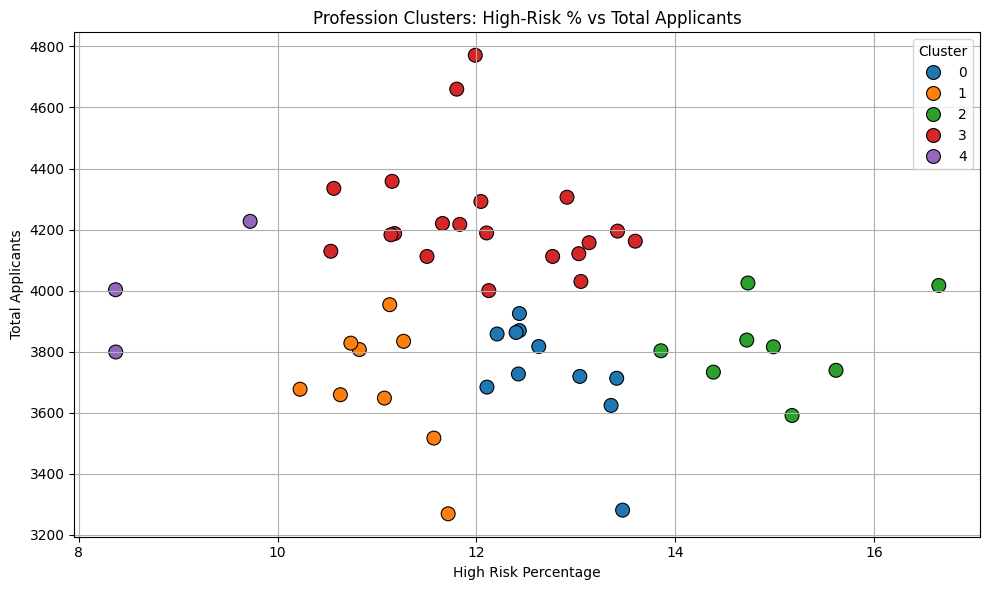


📌 Cluster Summary:
        High_Risk_Percent              Total      
                     mean count         mean count
Cluster                                           
0               12.719157    11  3734.545455    11
1               11.019391     9  3688.111111     9
2               15.017067     8  3820.250000     8
3               12.077370    20  4236.800000    20
4                8.820852     3  4009.666667     3


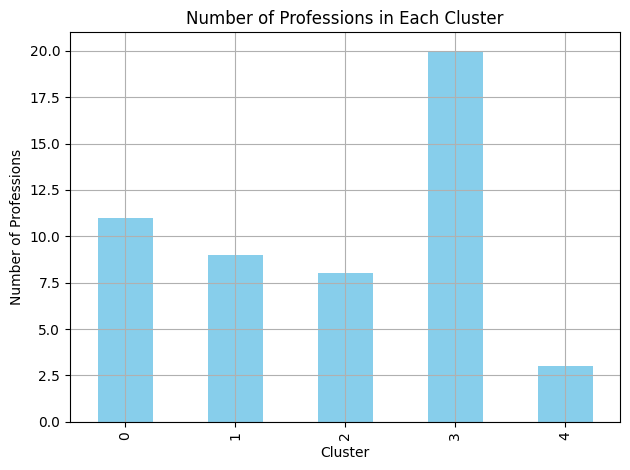

,Profession,Cluster
38,Police_officer,2
3,Army_officer,2
7,Chartered_Accountant,2
46,Surveyor,2
43,Software_Developer,2
41,Scientist,2
26,Geologist,2
5,Aviator,2
28,Hotel_Manager,3
35,Official,0


In [ ]:
profession_vs_risk_flag(train_df)

### 📌 **Inference: Profession-wise Risk & Cluster Insights**

#### 🔹 **Profession-Level Observations**:

- **Top High-Risk Professions** (based on `High_Risk_Percent`):
  - **Police_officer (16.65%)**
  - **Army_officer (15.62%)**
  - **Chartered_Accountant (15.18%)**
  - **Surveyor (14.99%)**
  - **Software_Developer (14.73%)**

  These professions are significantly above the general average risk level and may involve higher stress, exposure, or decision-critical environments.

- **Lowest Risk Professions**:
  - **Petroleum_Engineer (8.37%)**
  - **Technology_specialist (8.37%)**
  - **Industrial_Engineer (9.72%)**

  These roles might be associated with more structured environments, better controls, or fewer personal liability factors.

---

#### 🔹 **Cluster-Level Interpretation**:

| Cluster | Avg. High Risk % | Avg. Total People | Inference |
|--------:|------------------:|-------------------:|-----------|
| **2**   | **15.02%**        | 3,820              | 🔥 **High-risk cluster** — Contains professions with elevated risk levels; likely includes roles like police, army, surveyor. Suitable for targeted intervention or insurance modeling. |
| **0**   | 12.72%            | 3,735              | Moderate-high risk cluster — Slightly above general average; professions here may still warrant attention. |
| **3**   | 12.08%            | **4,237**          | Moderate risk but highest population — A key focus area due to the sheer volume of individuals involved. Even small improvements could have major impact. |
| **1**   | 11.02%            | 3,688              | Low-moderate risk — Generally safer professions. Still, certain individuals may present outliers. |
| **4**   | **8.82%**         | **4,009**          | 🧊 **Low-risk cluster** — Represents the safest professions, likely more technical or isolated roles. Good benchmark for baseline risk. |

---

### 🧠 **Strategic Takeaways**:

- **Cluster 2** is critical for proactive risk mitigation (e.g., targeted wellness programs or risk training).
- **Cluster 3**, despite moderate risk, should not be ignored due to its **large population** — small improvements yield high gains.
- **Cluster 4** could serve as a **reference group** for setting safety benchmarks or best practices.

📊 STATE vs Risk_Flag Percentage Table:
Risk_Flag              0      1
STATE                          
Andhra_Pradesh     88.24  11.76
Assam              86.98  13.02
Bihar              87.04  12.96
Chandigarh         91.46   8.54
Chhattisgarh       86.93  13.07
Delhi              89.36  10.64
Gujarat            88.27  11.73
Haryana            87.78  12.22
Himachal_Pradesh   86.80  13.20
Jammu_and_Kashmir  84.22  15.78
Jharkhand          87.03  12.97
Karnataka          89.89  10.11
Kerala             83.72  16.28
Madhya_Pradesh     84.65  15.35
Maharashtra        88.69  11.31
Manipur            79.17  20.83
Mizoram            88.18  11.82
Odisha             85.33  14.67
Puducherry         88.24  11.76
Punjab             91.11   8.89
Rajasthan          85.78  14.22
Sikkim             95.81   4.19
Tamil_Nadu         89.85  10.15
Telangana          86.76  13.24
Tripura            84.13  15.87
Uttar_Pradesh      88.23  11.77
Uttar_Pradesh[5]   86.13  13.87
Uttarakhand        92.90   7.10
W

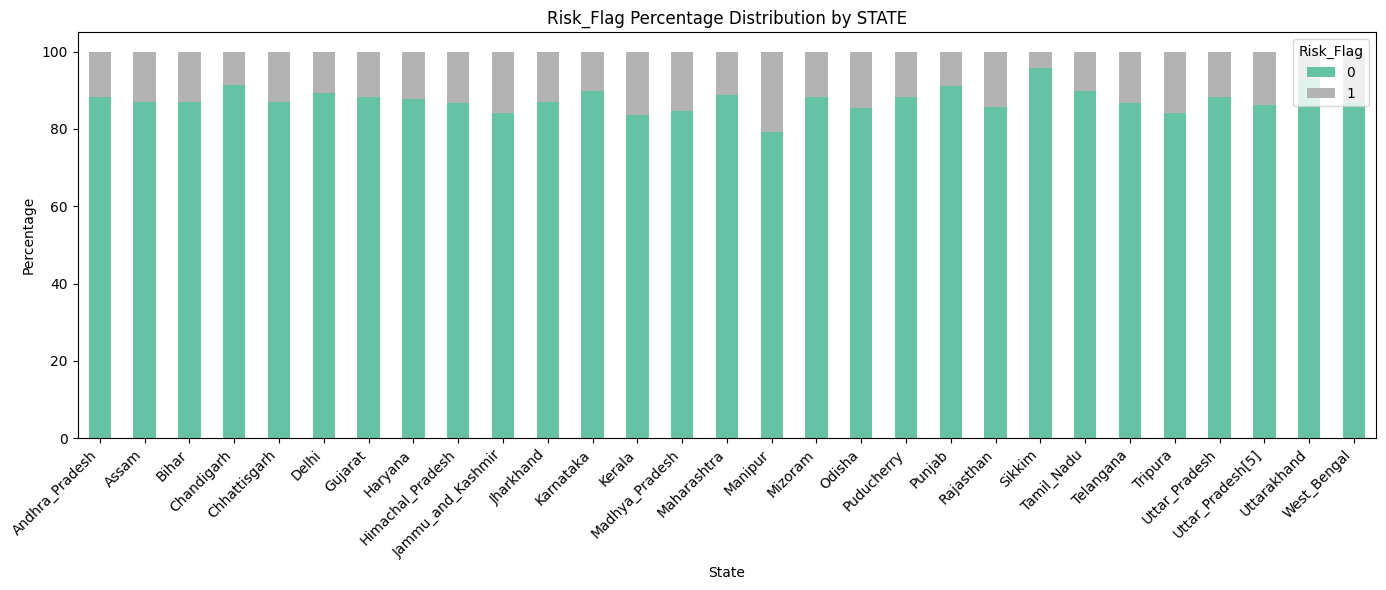

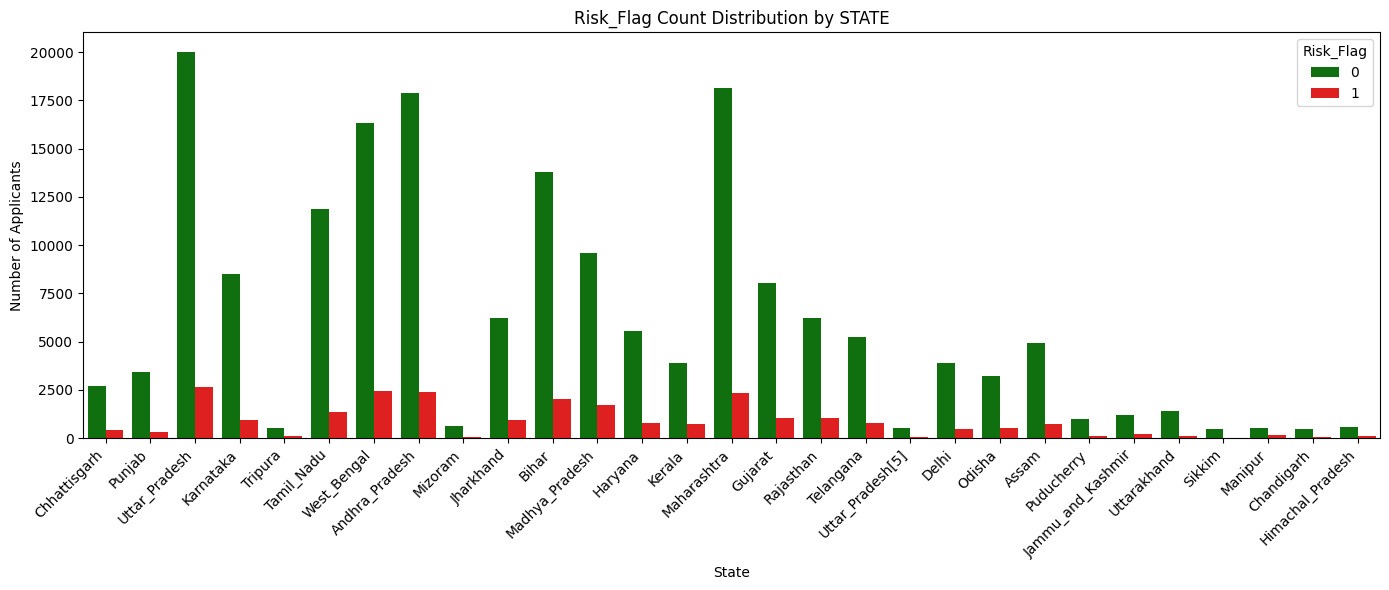

In [ ]:
state_vs_risk_flag(train_df)

### 📌 **Key Inferences from STATE vs Risk_Flag:**

| Category                      | Description                                                                 |
|------------------------------|-----------------------------------------------------------------------------|
| 🔼 **Low Risk States**       | Sikkim (95.81%), Uttarakhand (92.90%), Chandigarh (91.46%), Punjab (91.11%) |
| ⚖️ **Mid Risk States**       | Delhi (89.36%), Karnataka (89.89%), Tamil Nadu (89.85%), Gujarat (88.27%)   |
| 🔽 **Higher Risk States**    | Kerala (16.28%), Manipur (20.83%), Tripura (15.87%), J&K (15.78%)           |

- **Sikkim** leads with the **lowest risk flag (1)** percentage at only **4.19%**.
- **Manipur** has the **highest proportion of risky applicants**, with **20.83%** flagged as high risk.
- States like **Kerala, Tripura, and Madhya Pradesh** also reflect a notably higher-than-average risk.

📊 CURRENT_JOB_YRS vs Risk_Flag Percentage Table:
Risk_Flag            0      1
CURRENT_JOB_YRS              
0                85.77  14.23
1                84.53  15.47
2                83.16  16.84
3                88.45  11.55
4                88.67  11.33
5                88.24  11.76
6                87.70  12.30
7                88.22  11.78
8                88.35  11.65
9                89.15  10.85
10               88.02  11.98
11               86.89  13.11
12               89.49  10.51
13               86.27  13.73
14               88.07  11.93


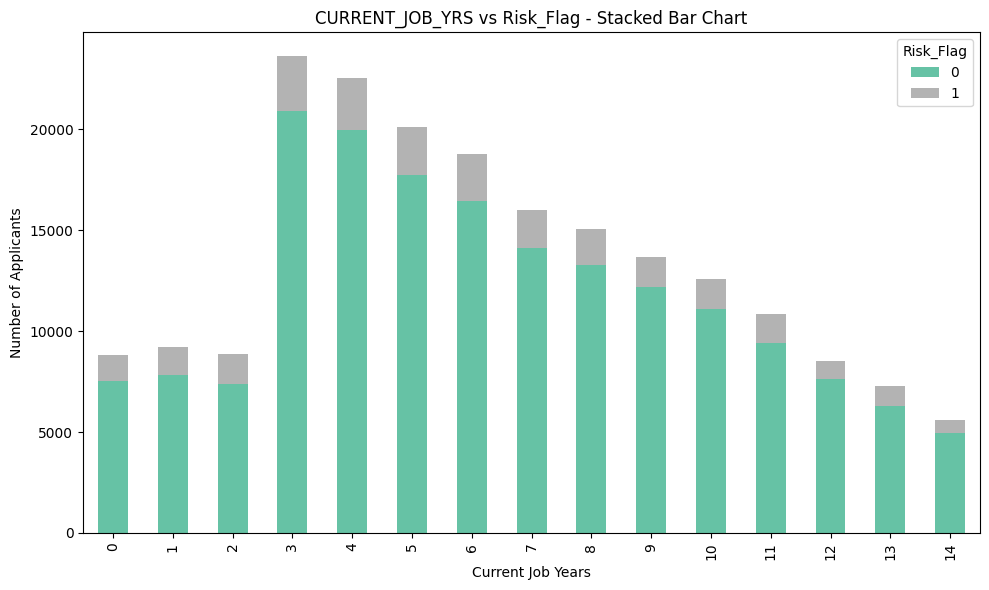

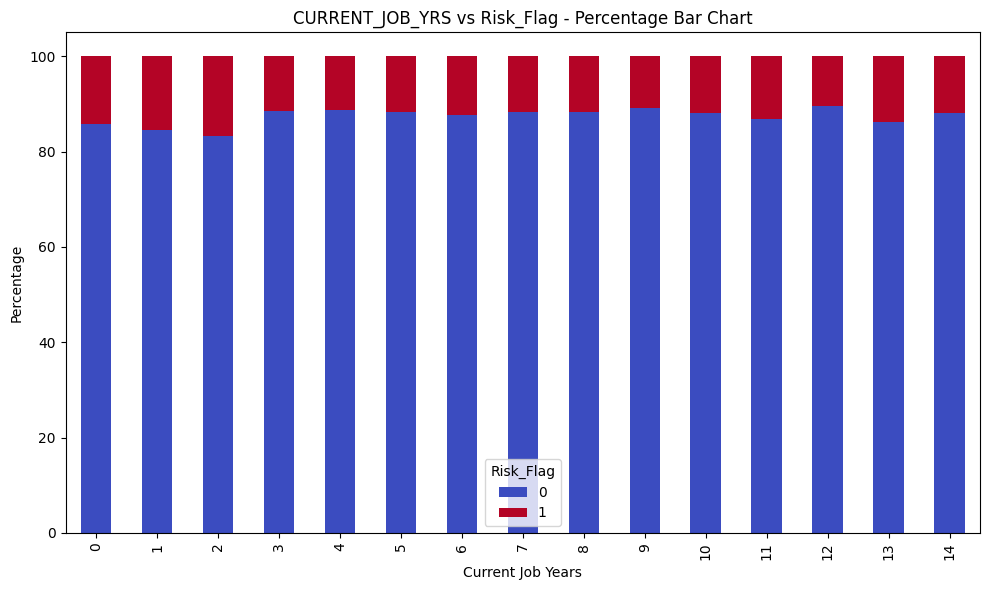

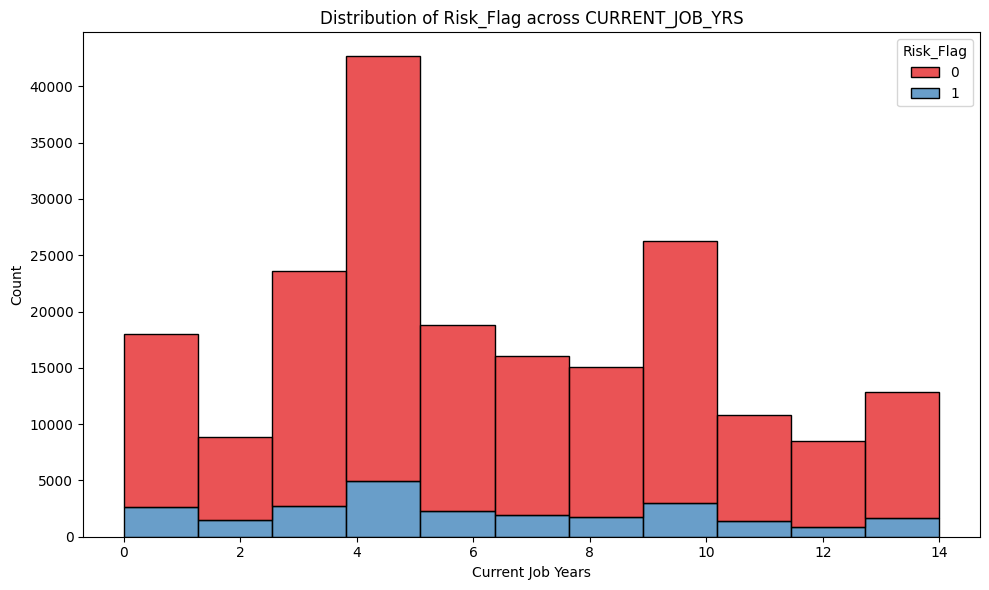

In [ ]:
analyze_job_years_vs_risk(train_df)

### 📈 Inference: CURRENT_JOB_YRS vs Risk_Flag

Here's what we can interpret from the percentage distribution:



#### 🔹 **Higher Risk (Risk_Flag = 1) Among Newer Employees**
- The **first 3 years** of employment show **higher risk levels**:
  - **0 years**: 14.23% risky
  - **1 year**: 15.47% risky
  - **2 years**: 16.84% risky (the highest)
- This suggests that **less job experience correlates with higher default risk**.



#### 🔹 **Lower Risk With More Experience**
- Starting from **year 3 and above**, the risk levels drop below 12%:
  - **3–10 years**: Risk ranges from **10.85% to 12.30%**
  - **Best risk score**: Year **12** (only **10.51% risky**)



#### 🔹 **Slight Fluctuations in Later Years**
- Years **11 to 14** show **mild increases** in risk again (13–13.73%), possibly due to:
  - Career changes
  - Pre-retirement transitions
  - Small sample size in those years

📊 CURRENT_HOUSE_YRS vs Risk_Flag Percentage Table:
Risk_Flag              0      1
CURRENT_HOUSE_YRS              
10                 87.63  12.37
11                 87.55  12.45
12                 87.78  12.22
13                 87.72  12.28
14                 87.93  12.07


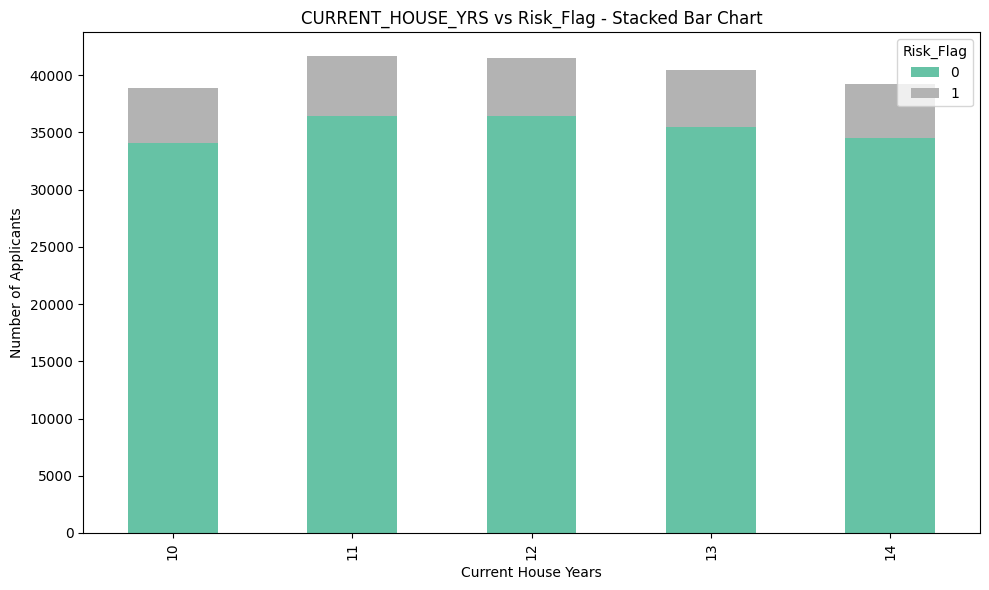

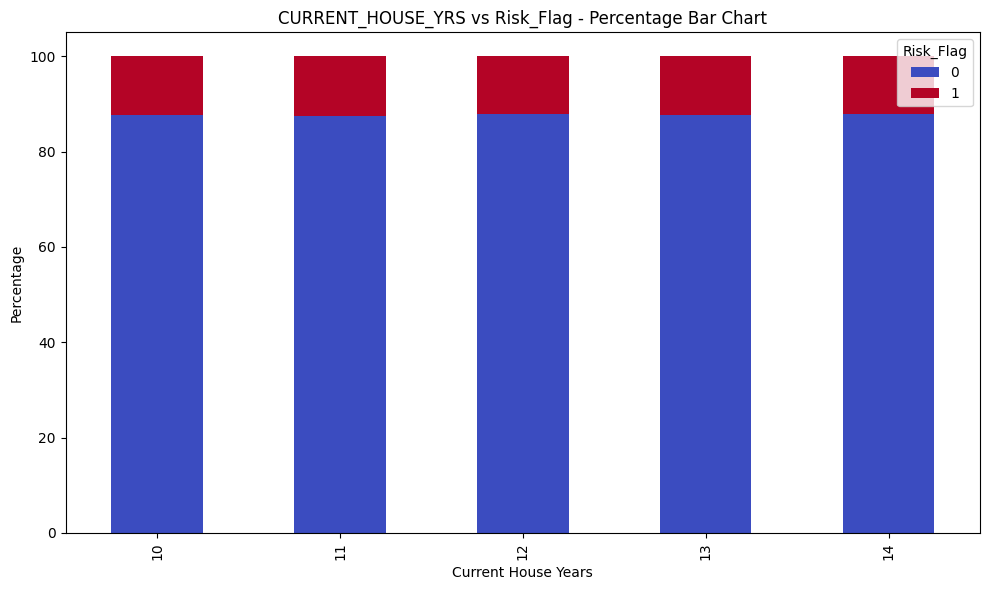

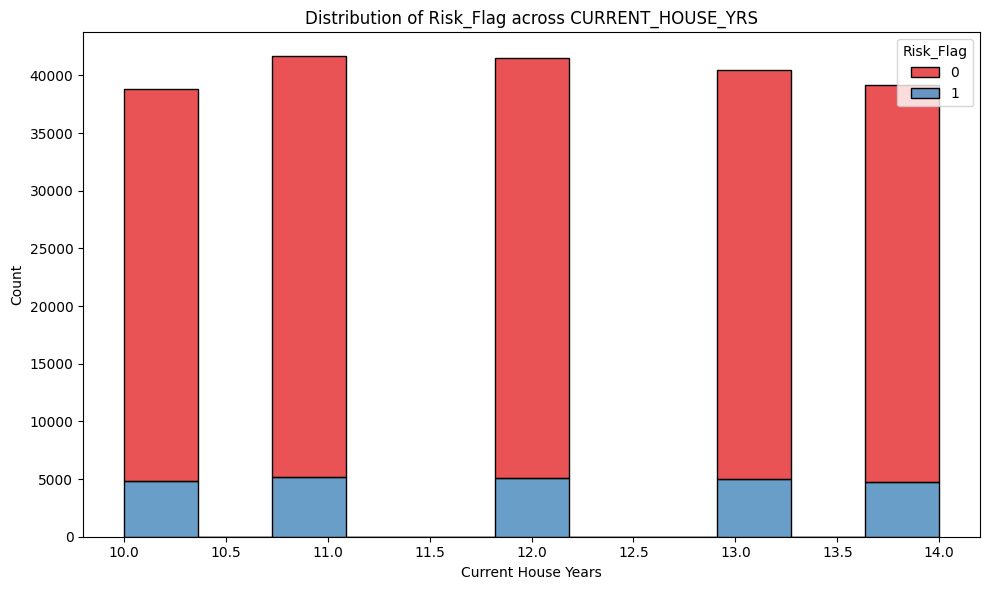

In [ ]:
analyze_house_years_vs_risk(train_df)

### 📊 **CURRENT_HOUSE_YRS vs Risk_Flag Percentage Table:**
```
Risk_Flag              0      1
CURRENT_HOUSE_YRS               
10                 87.63  12.37
11                 87.55  12.45
12                 87.78  12.22
13                 87.72  12.28
14                 87.93  12.07
```

### Inference:

1. **Overall Risk_Flag Distribution:**
   - For every year of house tenure (`CURRENT_HOUSE_YRS`), the percentage of applicants with a `Risk_Flag` of `1` is consistently around **12%**.
   - The remaining **87%** of applicants have a `Risk_Flag` of `0`.

2. **Stability Across Years:**
   - The percentages for `Risk_Flag` = `0` (not risky) and `Risk_Flag` = `1` (risky) are quite stable across the different years of house ownership.
   - The differences in percentages between consecutive years (`CURRENT_HOUSE_YRS` 10–14) are minimal (ranging between 0.12% and 0.22%), indicating no strong fluctuation in risk based on the number of years someone has owned a house.

3. **Slightly Higher Risk for Longer House Tenure:**
   - There is a very slight trend of **decreasing risk** over time for individuals with longer house ownership (`CURRENT_HOUSE_YRS`). The percentage of applicants with `Risk_Flag` = `1` decreases from 12.37% at `CURRENT_HOUSE_YRS` = 10 to 12.07% at `CURRENT_HOUSE_YRS` = 14.
   - This suggests that individuals with a longer duration of house ownership may be marginally less likely to be flagged as risky.

4. **Risk Stability:**
   - The proportion of risky applicants (Risk_Flag = 1) remains relatively consistent across these years of house ownership, which suggests that `CURRENT_HOUSE_YRS` may not be a significant factor in determining risk, or other factors might be influencing risk more strongly.

### Conclusion:
- **Risk is fairly constant** across different house ownership durations, with a very small trend toward lower risk as house ownership years increase.

# Feature Engineering

In [ ]:
#Getting Top 5 data
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1
4,146824,3589662,42,18,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh,13,13,0


In [ ]:
def group_ages_with_midpoints(df, age_col='Age', bin_size=10):
    """
    Groups ages into bins and computes the midpoint of each bin.

    Parameters:
    - df: pandas DataFrame
    - age_col: name of the age column (default 'Age')
    - bin_size: size of each age bin (default 10)

    Returns:
    - df: original DataFrame with two new columns: 'Age_Group' and 'Age_Midpoint'
    """
    # Define age bin edges
    min_age = df[age_col].min()
    max_age = df[age_col].max()
    bins = np.arange(min_age, max_age + bin_size, bin_size)

    # Create age labels (e.g., '20-30') and midpoints
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    midpoints = [(bins[i] + bins[i+1] - 1) / 2 for i in range(len(bins)-1)]

    # Cut ages into groups
    df['Age_Group'] = pd.cut(df[age_col], bins=bins, labels=labels, include_lowest=True)
    df['Age_Midpoint'] = pd.cut(df[age_col], bins=bins, labels=midpoints, include_lowest=True)
    df['Age_Midpoint'] = df['Age_Midpoint'].astype(float)  # Ensure numeric type

    return df


In [ ]:
train_df = group_ages_with_midpoints(train_df, age_col='Age', bin_size=10)
train_df[['Age', 'Age_Group', 'Age_Midpoint']].head()

,Age,Age_Group,Age_Midpoint
0,49,41-50,45.5
1,31,21-30,25.5
2,26,21-30,25.5
3,42,41-50,45.5
4,42,41-50,45.5


**We grouped ages and used midpoints to simplify the data, reduce variability, and capture meaningful patterns in how risk changes across life stages. This approach improves model performance, enhances interpretability, and ensures more consistent and reliable risk predictions.**

# ADDING FEATURES TO BOOST ALGORITHM

In [ ]:
# Convert Age_Group like '21-30' to midpoint numeric value
def age_group_to_midpoint(age_group):
    if isinstance(age_group, str) and '-' in age_group:
        start, end = map(int, age_group.split('-'))
        return (start + end) / 2
    return np.nan


train_df['Age_Midpoint'] = train_df['Age_Group'].apply(age_group_to_midpoint).astype(float)


# Derived Features using Age_Midpoint
train_df['Experience_Age_Ratio'] = train_df['Experience'] / train_df['Age_Midpoint']
train_df['Job_Stability'] = train_df['CURRENT_JOB_YRS'] / (train_df['Experience'] + 1)
train_df['House_Stability'] = train_df['CURRENT_HOUSE_YRS'] / train_df['Age_Midpoint']
train_df['Experienced'] = (train_df['Experience'] > 10).astype(int)

train_df['Income_to_Exp_Ratio'] = train_df['Income'] / (train_df['Experience'] + 1)

# Wealth Index - Weighted combination of income and asset ownership
train_df['Wealth_Index'] = (
    train_df['Income'] * train_df['House_Ownership'].map({'Rented': 0.5, 'Owned': 1, 'Norent_Noown': 0}).fillna(0) +
    train_df['Car_Ownership'].map({'yes': 1, 'no': 0}).fillna(0)
)


# Stability score of current house relative to adult life duration
train_df['House_Stability_Score'] = train_df['CURRENT_HOUSE_YRS'] / (train_df['Age'] - 18 + 1)

# Categorical Group-based Features
profession_stability = train_df.groupby('Profession')['CURRENT_JOB_YRS'].mean().to_dict()
train_df['Profession_Stability'] = train_df['Profession'].map(profession_stability)

city_income_avg = train_df.groupby('CITY')['Income'].mean().to_dict()
train_df['City_Cost_of_Living'] = train_df['CITY'].map(city_income_avg)

train_df['Marital_Home_Status'] = train_df['Married/Single'] + "_" + train_df['House_Ownership']

state_risk = train_df.groupby('STATE')['Risk_Flag'].mean().to_dict()
train_df['State_Risk_Profile'] = train_df['STATE'].map(state_risk)

# Interactions
train_df['Income_Age_Interaction'] = train_df['Income'] * train_df['Age']
train_df['Experience_Age_Ratio'] = train_df['Experience'] / (train_df['Age'] - 18 + 1)

bins = [0, 5, 15, 50]
labels = ['Early', 'Mid', 'Late']

# Binning the 'Experience' column
train_df['Career_Stage'] = pd.cut(train_df['Experience'], bins=bins, labels=labels, right=False)

# Add 'Unknown' to the existing categories
train_df['Career_Stage'] = train_df['Career_Stage'].cat.add_categories('Unknown')

# Fill NaN values (if any) with 'Unknown'
train_df['Career_Stage'] = train_df['Career_Stage'].fillna('Unknown')


train_df['Years_Since_First_Job'] = train_df['Age'] - train_df['Experience']


**These engineered features enhance our risk assessment model by capturing deeper behavioral and socio-economic patterns that standard variables might miss.**

- **Experience_Age_Ratio, Job_Stability, and House_Stability** help assess life and career consistency, which can signal lower or higher risk.
- **Wealth_Index** and **Income-to-Experience Ratio** combine financial status and earning efficiency, which are key indicators of stability.
- **Profession_Stability** and **City_Cost_of_Living** introduce group-level insights into employment and regional economic context.
- **State_Risk_Profile** reflects the average risk behavior at a state level.
- **Categorical interactions** like **Marital_Home_Status** and **Career_Stage** add socio-contextual insights that improve the model's ability to generalize.
- **Years_Since_First_Job** and **Income_Age_Interaction** capture lifecycle and income maturity.

Together, these features help the model make smarter, more reliable predictions about who is more likely to be high risk.

In [ ]:
#Dropping Age_Group as will already have a age mid_point
train_df.drop(columns=['Age_Group'], inplace=True)

## Splitting Data Into X and y

In [ ]:
X = train_df.drop(["Risk_Flag"], axis=1)
y = train_df["Risk_Flag"]

In [ ]:
print(X.shape)
print(y.shape)

(201600, 27)
(201600,)


In [ ]:
print(X.head())
y.head()

       Id   Income  Age  Experience Married/Single House_Ownership  \
0  172392  4588175   49          20         single          rented   
1  246131  6510821   31          15         single          rented   
2   51741  9338129   26           7         single          rented   
3  143394  8053436   42           8         single          rented   
4  146824  3589662   42          18         single          rented   

  Car_Ownership        Profession             CITY          STATE  ...  \
0            no         Secretary         Bilaspur   Chhattisgarh  ...   
1            no         Librarian         Amritsar         Punjab  ...   
2            no            Artist      Farrukhabad  Uttar_Pradesh  ...   
3            no              Chef  Mysore[7][8][9]      Karnataka  ...   
4           yes  Technical_writer         Bareilly  Uttar_Pradesh  ...   

   Income_to_Exp_Ratio  Wealth_Index  House_Stability_Score  \
0         2.184845e+05           0.0               0.343750   
1       

,Risk_Flag
0,0
1,1
2,0
3,1
4,0


### Spliting Data into Train and Test Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shapes of train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (161280, 27)
X_test shape: (40320, 27)
y_train shape: (161280,)
y_test shape: (40320,)


### Encoding Categorical Features

In [ ]:
X_train, X_test =  encode_category_data(X_train, X_test)

In [ ]:
X_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Income_to_Exp_Ratio,Wealth_Index,House_Stability_Score,Profession_Stability,City_Cost_of_Living,Marital_Home_Status,State_Risk_Profile,Income_Age_Interaction,Career_Stage,Years_Since_First_Job
57654,157355,6670038,37,13,1,2.0,0,4.0,12.0,0.0,...,4.764313e+05,0.0,0.700000,6.240021,5.480007e+06,5.0,0.117569,246791406,2.0,24
115853,141782,2572120,22,0,1,2.0,0,10.0,4.0,14.0,...,2.572120e+06,0.0,2.200000,6.642607,4.962116e+06,5.0,0.113118,56586640,0.0,22
130470,65328,4341353,78,6,1,0.0,1,36.0,316.0,7.0,...,6.201933e+05,1.0,0.163934,6.441169,5.343853e+06,3.0,0.122163,338625534,2.0,72
39155,246806,3177468,42,17,0,2.0,1,13.0,90.0,0.0,...,1.765260e+05,1.0,0.560000,6.204134,5.144078e+06,2.0,0.117569,133453656,1.0,25
175732,1477,7710970,39,13,1,2.0,0,31.0,33.0,28.0,...,5.507836e+05,0.0,0.636364,5.840186,5.305773e+06,5.0,0.128991,300727830,2.0,26


# Using Stander Scaler on Train and Test Set

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on train set, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(X_test_scaled.shape)
X_train_scaled.shape

(40320, 27)


(161280, 27)

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
# prompt: Check for duplicate in y_train_balanced

# Check for duplicates in y_train_balanced
duplicate_indices = np.where(np.diff(y_train_balanced) == 0)[0] + 1
print(f"Number of duplicates in y_train_balanced: {len(duplicate_indices)}")

if len(duplicate_indices) > 0:
    print("Indices of duplicate values:")
duplicate_indices


Number of duplicates in y_train_balanced: 247946
Indices of duplicate values:


array([     1,      2,      3, ..., 282753, 282754, 282755])

# KNN

In [ ]:
from imblearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# 1. Define KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# 2. Create a pipeline: SMOTE + KNN
pipeline = make_pipeline(
    SMOTE(random_state=42),
    KNeighborsClassifier(n_neighbors=5)
)

# 3. Fit the pipeline on the original training data (not yet SMOTEd)
pipeline.fit(X_train_balanced, y_train_balanced)

# 4. Predict on test data
y_pred_knn = pipeline.predict(X_test_scaled)

# 5. Evaluate
print("📊 KNN Classifier Report After SMOTE:")
print(classification_report(y_test, y_pred_knn))


📊 KNN Classifier Report After SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     35466
           1       0.47      0.80      0.59      4854

    accuracy                           0.87     40320
   macro avg       0.72      0.84      0.76     40320
weighted avg       0.91      0.87      0.88     40320



In [ ]:
# Evaluate
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results
print(f"✅ Accuracy: {accuracy_knn:.4f}")
print("🧮 Confusion Matrix:\n", conf_matrix_knn)
print(f"🎯 F1 Score: {f1_knn:.4f}")


✅ Accuracy: 0.8666
🧮 Confusion Matrix:
 [[31040  4426]
 [  954  3900]]
🎯 F1 Score: 0.5918


# XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train on balanced data
xgb_model.fit(X_train_balanced, y_train_balanced)

# Predict on original test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print results
print(f"✅ Accuracy: {accuracy_xgb:.4f}")
print("🧮 Confusion Matrix:\n", conf_matrix_xgb)
print(f"🎯 F1 Score: {f1_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy: 0.8812
🧮 Confusion Matrix:
 [[31879  3587]
 [ 1205  3649]]
🎯 F1 Score: 0.6036


In [ ]:
# 5. Evaluate
print("📊 KNN Classifier Report After SMOTE:")
print(classification_report(y_test, y_pred_xgb))

📊 KNN Classifier Report After SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     35466
           1       0.50      0.75      0.60      4854

    accuracy                           0.88     40320
   macro avg       0.73      0.83      0.77     40320
weighted avg       0.91      0.88      0.89     40320

